## RNN (Recurrent Neural Networks) 是什麼?

循環神經網絡（RNN）是非常流行的模型，在NLP的很多任務中已經展示出了很大的威力。

RNN背後的思想是利用信息序列間彼此的相關性。在傳統的神經網絡中，我們假設所有的輸入（包括輸出）之間是相互獨立的。對於很多任務來說，這樣的假設並不適當。 

如果我們想預測一個序列中的下一個詞，我們最好能知道哪些詞在它前面。RNN之所以是循環的，是因為它針對序列中的每一個元素都執行相同的操作，每一個操作都依賴於之前的計算結果(state)，換一種方式思考，可以認為RNN記憶了到當前為止已經計算過的信息。

下面是RNN的一個典型結構圖：


![](https://4.bp.blogspot.com/-U-b50pPNd_s/WQ8C-5g0siI/AAAAAAAAI8c/VCpWPA-z3Y8iTvLIhX6hlO83BqogFMu5ACLcB/s640/RNN2.png)

為了使這些循環和狀態的概念更清楚，我們用Numpy來實現一個簡單的RNN。假設我們的RNN需要接受一個"向量的序列(sequence of vectors)"作為輸人(input), 這個"向量的序列"用一個2維的張量(timesteps, input_features)來表示。

我們的RNN要迭代每一個"時間步(timestep)", 之後我們用"t"來表示"時間步(timestep)"。那某特定"時間步(t)"的輸入為"X"(input_feature

## 一個簡單RNN的pseudo-code:

```
state_t = 0 # 這是某一個"時間步(timestep)"的內部狀態(state)
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t # 前一個處理過的輸出(output)變成新的狀態(state)
```

我們可以進一步的細分其中的 " f " 這個函數的內容:
> " f " 函數: 用來轉換輸入(input)與狀態(state)成為輸出(output),這個函數通過兩個矩陣W和U和一個偏向量(bias)進行參數化。

## 一個簡單RNN更詳細的pseudo-code:

```
state_t = 0 # 這是某一個"時間步(timestep)"的內部狀態(state)
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t # 前一個處理過的輸出(output)變成新的狀態(state)
```

## 用Numpy實現的一個簡單RNN
```
timesteps = 100 # 輸入序列中的時間步數
inputs_features = 32 # 輸入特徵空間的維度
output_features = 64 # 輸出特徵空間的維度

# 這是我們的輸入數據
inputs = np.random.random((timesteps, features))

# 這是我們的“初始狀態”：一個全零向量
state_t = np.zeros((output_features,))

# 創建隨機權重矩陣
W = np.random.random((input_features, output_features)
U = np.random.random((output_features, output_features)
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: 
    # 我們將輸入與當前狀態（即前一個輸出）組合以獲得當前輸出。
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    # 我們將此輸出存儲在一個列表中。
    successive_outputs.append(output_t)
    
    # 我們更新下一個時間步的網絡“狀態”
    state_t = output_t
    
# 最終輸出是2D張量(timesteps, output_features)
final_output_sequence = np.concatenate(successive_outputs, axis=0)
```

![](https://3.bp.blogspot.com/-9cz6YIf-3Wk/WQ8C-7QNnOI/AAAAAAAAI8g/iFhXR9t3ii0UE9ZRXs425wR_HYJk9i7WgCLcB/s640/RNN1.png)

## Keras中的第一個循環神經層

在Keras中的`SimpleRNN`神經層可視為上述Numpy簡單循環神經函式的實現。

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.1'

In [2]:
from keras.layers import SimpleRNN

跟上述Numpy的RNN函式有一些些的不同： `SimpleRNN`像所有其他Keras神經層一樣，它會批次地處理序列(batches of sequences)資料，而不是像我們的Numpy示例中的單個序列。 這意味著它需要的張量結構形狀`(batch_size，timesteps，input_features)`的輸入，而不是`(timesteps, input_features)`。

像Keras中的所有其它的循環神經層(recurrent layers)一樣，`SimpleRNN`可以用兩種不同的模式來運行：
1. 它可以返回每個時間步的連續輸出的全部序列（一個形狀為`(batch_size，timesteps，output_features)`的3D張量）
2. 或者它 可以僅返回每個輸入序列的最後一個輸出（一個形狀為`(batch_size，output_features)`的2D張量）。 

這兩種模式由`return_sequences`構造函數參數控制。 我們來看一個例子:

## 使用SimpleRNN並返回最後一個狀態

`return_sequences`預設為`False`

![many-to-one](https://i.stack.imgur.com/QCnpU.jpg)

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32)) # return_sequences預設為False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


## 使用SimpleRNN並返回完整的狀態序列

把`return_sequences`設為`True`

![many-to-many](https://i.stack.imgur.com/DiPyQ.jpg)

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) # 把return_sequences設為True
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


## 將多個RNN圖層堆疊在一起

為了增加神經網絡的表示能力，有時把多個RNN一個接一個地堆疊起來很有用。在這樣的設置中，我們必須讓所有的RNN中間層返回完整的序列：

![rnn-stacking](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_6/RNN_Stacking.png)

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) # 把return_sequences設為True
model.add(SimpleRNN(32, return_sequences=True)) # 把return_sequences設為True
model.add(SimpleRNN(32, return_sequences=True)) # 把return_sequences設為True
model.add(SimpleRNN(32))  # 只有最後的RNN層只需要最後的output, 因此不必特別去設置"return_sequences"
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


現在讓我們嘗試在IMDB電影評論分類問題上使用這種模型。 首先，我們預處理數據：

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 要考慮作為特徵的語詞數量
maxlen = 500  # 當句子的長度超過500個語詞的部份,就把它刪除掉
batch_size = 32

# 載入IMDB的資料
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# 如果長度不夠的話就補空的
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


我們使用一個`Embedding`層和一個`SimpleRNN`層來訓練一個簡單的循環網絡(`RNN`)：

In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.6397 - acc: 0.6175 - val_loss: 0.4824 - val_acc: 0.7774
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.4124 - acc: 0.8239 - val_loss: 0.4232 - val_acc: 0.8078
Epoch 3/10
20000/20000 [==============================] - 35s 2ms/step - loss

我們用圖表來看一下模型在訓練(training)和驗證(validation)的損失(loss)和準確性(accuracy)：

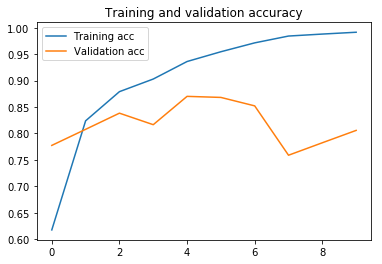

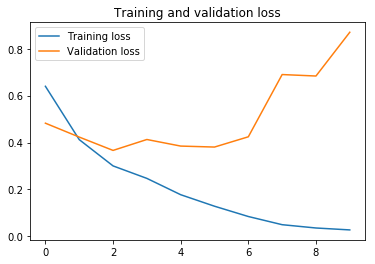

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

使用`SimpleRNN`我們對這個數據集獲得了81％的測試精度。 這個網絡模型表現不算太好,部分問題是我們的輸入只考慮了前500個語詞而不是考慮所有序列語詞。 別外的一個問題是`SimpleRNN`在處理長序列（如文本）方面表現不太好(有梯度消失或梯度爆炸的現象)。我們來看看其它更高級的神經圖層。

## 了解長短期記憶模型（long short-term memory，LSTM）與 GRU

`SimpleRNN`不是Keras唯一可用的RNN層：在Keras中還有`LSTM`和`GRU`。 在實務中，你將永遠使用其中的一個，`SimpleRNN`一般來說太簡單了，以至於沒有任何實際用途。

LSTM（long short-term memory單元(cell)使用了輸入閘(input gate)，忘記閘(forget get)和輸出閘(output gate)來解決原本的RNN單元(cell)會面臨的梯度消失或梯度爆炸的現象。

![lstm_vs_rnn](https://cdn-images-1.medium.com/max/1600/0*kl2Cd89GGQClOS48.)

這些閘每個都有自己的一組權重值。 整個LSTM單元(cell)是可微分的（意思是我們計算梯度並使用它們來更新權重），所以我們可以使用反向(back-propagation)來迭代訓練它。基本上，LSTM單元為我們提供遺忘(forget)，記憶(memory)和關注(attention)的機制。 

![lstm_cell](https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.)

## 一個具體的LSTM範例

現在讓我們看看LSTM如何解決實際的問題：我們將使用LSTM層建立一個模型，並在IMDB數據上進行訓練。 這個網絡設計類似於我們剛剛介紹的那個`SimpleRNN`。 我們只指定LSTM圖層的輸出維度，並將其他所有參數（有很多）留給Keras默認值。 Keras具有良好的默認設置，並且事情幾乎總是“正常工作”，而無需我們花太多時間手動調整參數。

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.5242 - acc: 0.7536 - val_loss: 0.3850 - val_acc: 0.8578
Epoch 2/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.3017 - acc: 0.8801 - val_loss: 0.3114 - val_acc: 0.8830
Epoch 3/10
20000/20000 [==============================] - 108s 5ms/step - l

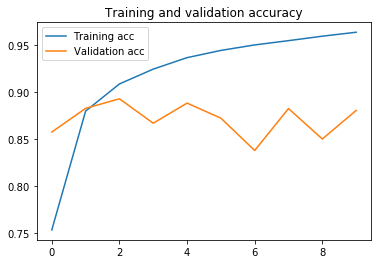

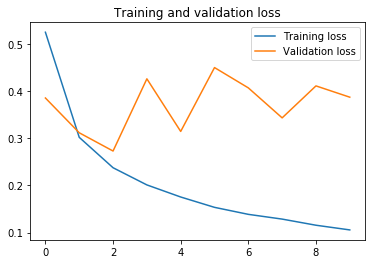

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

使用`LSTM`對這個數據集獲得了88％的測試精度, 相比`SimpleRNN`來說效果的確好多了。

### 參考: 
* [fchollet: deep-learning-with-python-notebooks (原文)](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb)
* [Keras官網](http://keras.io/)

MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.